# Polars - Blazingly fast DataFrames in 2023

It has been over 2 years already since [I created my first notebook about Polars](https://github.com/r-brink/polars-tutorial/blob/master/polars-tutorial.ipynb) ([Medium post here](https://r-brink.medium.com/introduction-to-polars-ee9e638dc163)). Back then a small project started by Ritchie Vink with promising performance. 2 years later, the project has over 10.000 stars on [Github](https://github.com/pola-rs/polars) and is still leading many performance benchmarks. 

In this updated tutorial we will revisit the original analyses and rewrite the queries following the latest version of Polars and the Polars book.

The structure of this repo:


> Remarks written in the earlier notebook are marked like this (as a quote)


```python
import polars as pl

# code snippets from the previous notebook are commented out in the same cell
# so you can compare them easily
```

## Installing Polars

The first notebook ran with Polars `0.7.0`. Definitely time for an update.

First install Polars in your virtual environment. In this notebook we will work with Polars version 0.15.7. Add this to the pip install to ensure all cells run.

```shell
pip install polars==0.15.7
```

### Importing relevant packages and loading the data

In [1]:
import polars as pl

import matplotlib.pyplot as plt
%matplotlib inline

Nothing changed here. Still `import polars as pl`. 

> Polars already offers many functionalities that we are already familiar if you have worked with Pandas before. We can find an overview, including examples (for most), in the reference guide.

Find the dataset that we are going to use here: [Winemag-dataset](https://medium.com/p/48db12c0f067/edit#%20find%20the%20dataset%20here:%20https://www.kaggle.com/zynicide/wine-reviews/?select=winemag-data_first150k.csv)

In [2]:
df = pl.read_csv('winemag-data_first150k.csv')

### Basic dataframe inspection

In [3]:
df.shape

(150930, 11)

In [4]:
df.columns

['',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

Nothing has changed so far, until now. Instead of the Pandas-like syntax we used two years ago. We will use the expressions, as recommended by Polars.

> We strongly recommend selecting data with expressions for almost all use cases. Square bracket indexing is perhaps useful when doing exploratory data analysis in a terminal or notebook when you just want a quick look at a subset of data. ~ [Polars User Guide](https://pola-rs.github.io/polars-book/user-guide/)

In [5]:
df.select([
    pl.col('*').sample(n=5)
])

#   df.sample(n=5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
i64,str,str,str,i64,f64,str,str,str,str,str
90769,"""US""","""Robust and bri...","""Mariah Vineyar...",85,25.0,"""California""","""Mendocino Ridg...","""Mendocino/Lake...","""Zinfandel""","""Sanctuary"""
98530,"""US""","""A bit tough an...","""Reserve Bottli...",89,52.0,"""California""","""Green Valley""","""Sonoma""","""Pinot Noir""","""Hawley"""
102543,"""US""","""Tastes like or...","""Mo Zin""",80,20.0,"""California""","""Sonoma County""","""Sonoma""","""Red Blend""","""Spann Vineyard..."
23862,"""Chile""","""More grassy, s...","""EQ""",85,40.0,"""San Antonio""",null,null,"""Pinot Noir""","""Matetic"""
46561,"""Australia""","""The Adelaide H...","""Whippet""",89,21.0,"""South Australi...","""Adelaide""",null,"""Sauvignon Blan...","""Longview"""


We could still use the old way, as it is shorter. However, we can easily extend this expression to include more information if we want. It also helps us to solidify to work with expression in our workflow.

> The dataset has a lot to offer. With 11 variables and over 150k rows, there is a lot of data to analyse. We see a couple of variables that are interesting to look into, like price, country, points.

To select a column, we use the following expression.

In [6]:
df.select(
    pl.col("price")
).limit(10)

# Earlier we used the following:
#   df['price']
# Select by index is considered an anti-pattern in Polars 

price
f64
235.0
110.0
90.0
65.0
66.0
73.0
65.0
110.0
65.0


## Removing nulls

>Before we continue we want to have a closer look at if there are any nulls in the dataset.

In [7]:
df.select(
    pl.col("*").null_count()
)

# Earlier we used the following: 
#   df.null_count()   

,country,description,designation,points,price,province,region_1,region_2,variety,winery
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,5,0,45735,0,13695,5,25060,89977,0,0


Similar to our original notebook we will fill the nulls with the mean for the following reason.

> It seems that around a little less than 10% of the price variable has no value. We can either drop the rows with missing values or fill them. In this article, we will choose to use the mean as filling strategy.

In [8]:
df = df.with_column(
        pl.col("price").fill_null(strategy="mean").alias('price')
)

print(df.select('price').null_count())

shape: (1, 1)
┌───────┐
│ price │
│ ---   │
│ u32   │
╞═══════╡
│ 0     │
└───────┘


## Some analyses

> The next step is to dive in a little deeper and have a closer look at the dataset with some more complex functions.
> The goal that we want to achieve in the following part is to have a closer look at the countries and how they compare in terms of price and points.

In [9]:
df.select([
        pl.median("price").alias("median price"),
        pl.min("price").alias("min price"),
        pl.max("price").alias("max price"),
        pl.mean("price").alias("mean price")
    ]
)

# Analyses of wine prices
# print(f'Median price: {data["price"].median()}')
# print(f'Average price: {data["price"].mean()}')
# print(f'Maximum price: {data["price"].max()}')
# print(f'Minimum price: {data["price"].min()}')

median price,min price,max price,mean price
f64,f64,f64,f64
26.0,4.0,2300.0,33.131482


In [10]:
df.select([
        pl.median("points").alias("median points"),
        pl.min("points").alias("min points"),
        pl.max("points").alias("max points"),
        pl.mean("points").alias("mean points")
    ]
)

# Analyses of wine points
# print(f'Median points: {data["points"].median()}')
# print(f'Average points: {data["points"].mean()}')
# print(f'Maximum points: {data["points"].max()}')
# print(f'Minimum points: {data["points"].min()}')

median points,min points,max points,mean points
f64,i64,i64,f64
88.0,80,100,87.888418


Or we can just use the `describe()` function for quick statistics about our dataframe.

In [11]:
df.describe()

describe,column_0,country,description,designation,points,price,province,region_1,region_2,variety,winery
str,f64,str,str,str,f64,f64,str,str,str,str,str
"""count""",150930.0,"""150930""","""150930""","""150930""",150930.0,150930.0,"""150930""","""150930""","""150930""","""150930""","""150930"""
"""null_count""",0.0,"""5""","""0""","""45735""",0.0,0.0,"""5""","""25060""","""89977""","""0""","""0"""
"""mean""",75464.5,null,null,null,87.888418,33.131482,null,null,null,null,null
"""std""",43569.882402,null,null,null,3.222392,34.635438,null,null,null,null,null
"""min""",0.0,"""Albania""","""""Chremisa,"" th...","""""M""""",80.0,4.0,"""Achaia""","""Abruzzo""","""California Oth...","""Agiorgitiko""","""'37 Cellars"""
"""max""",150929.0,"""Uruguay""","""“Zéro Dosage” ...","""‘Rough Justice...",100.0,2300.0,"""Župa""","""Zonda Valley""","""Willamette Val...","""Žilavka""","""Štoka"""
"""median""",75464.5,null,null,null,88.0,26.0,null,null,null,null,null


> The minimum number of points shows that there is no such thing as bad wine.

## Filtering

In [12]:
df.select([
    pl.col("country").unique()
])

# data['country'].unique().to_list()

country
str
"""Croatia"""
"""Bosnia and Her..."
"""Argentina"""
"""Morocco"""
"""Italy"""
"""Cyprus"""
"""Lebanon"""
"""Switzerland"""
"""Georgia"""


From our earlier notebook

> There are two strange values in our dataset: an undefined country ("") and a country called 'US-France'.

In [13]:
df.filter(
    (pl.col('country') == 'US-France') |
    (pl.col('country').is_null())
)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
i64,str,str,str,i64,f64,str,str,str,str,str
1133,null,"""Delicate white...","""Askitikos""",90,17.0,null,null,null,"""Assyrtiko""","""Tsililis"""
1440,null,"""A blend of 60%...","""Shah""",90,30.0,null,null,null,"""Red Blend""","""Büyülübağ"""
68226,null,"""From first sni...","""Piedra Feliz""",81,15.0,null,null,null,"""Pinot Noir""","""Chilcas"""
113016,null,"""From first sni...","""Piedra Feliz""",81,15.0,null,null,null,"""Pinot Noir""","""Chilcas"""
135696,null,"""From first sni...","""Piedra Feliz""",81,15.0,null,null,null,"""Pinot Noir""","""Chilcas"""
144054,"""US-France""","""Defies categor...",null,88,50.0,"""Santa Barbara ...",null,null,"""Viognier""","""Deux C"""


> There are only 6 of them, so it is safe to drop them.

In [14]:
df = df.filter(
    (pl.col('country').is_not_null()) &
    (pl.col('country') != 'US-France')
)

# data = data[(data['country'] != '') & (data['country'] != 'US-France')]

> Time to look into the countries that produces the best wine according to the points and has the highest price for a bottle.

In [15]:
df.groupby('country').agg(
    pl.col('points').mean().alias('points_mean')
).sort(by='points_mean', reverse=True)

# We group by country, select the `points` variable 
# and call the mean to see the average number of points. 
# After that we sort the list by 'average points'. 

# data.groupby('country')
#       .select('points').mean()
#       .sort(by_column='points_mean', reverse=True)

country,points_mean
str,f64
"""England""",92.888889
"""Austria""",89.276742
"""France""",88.92587
"""Germany""",88.626427
"""Italy""",88.413664
"""Canada""",88.239796
"""Slovenia""",88.234043
"""Morocco""",88.166667
"""Turkey""",88.096154


> England is leading the list for the best wines. Wonder how they think about that on the other side of the Canal in France.

In [16]:
df.groupby('country').agg(
    pl.col('price').max().alias('price_max')
).sort(by='price_max', reverse=True)

# data.groupby('country')
#   .select('price').max()
#   .sort(by_column='price_max', reverse=True)

country,price_max
str,f64
"""France""",2300.0
"""US""",2013.0
"""Austria""",1100.0
"""Portugal""",980.0
"""Italy""",900.0
"""Australia""",850.0
"""Germany""",775.0
"""Spain""",770.0
"""Hungary""",764.0


### Plotting with Polars

> To get a better insight into the differences it always helps to have some nice plots. Where Pandas has a plotting functionality build in, we have to rely on our Matplotlib skills for Polars. We focus on the top 15 countries.

In [17]:
top_15_countries = df.groupby('country').agg(
    pl.col('points').mean().alias('points_mean')
).sort(by='points_mean', reverse=True).limit(15)

top_15_countries

# Get a list of the top 15 countries by taking the first 15 rows 
# of the groupby that we did earlier
# 
# top_15_countries = data.groupby('country')
#       .select('points').mean()
#       .sort(by_column='points_mean', reverse=True)[:15][0]

country,points_mean
str,f64
"""England""",92.888889
"""Austria""",89.276742
"""France""",88.92587
"""Germany""",88.626427
"""Italy""",88.413664
"""Canada""",88.239796
"""Slovenia""",88.234043
"""Morocco""",88.166667
"""Turkey""",88.096154


In [18]:
df_top15 = top_15_countries.join(df, on='country', how='left')

df_top15

# df_top15 = pl.DataFrame({'country': top_15_countries}).join(data, on='country', how='left')

country,points_mean,,description,designation,points,price,province,region_1,region_2,variety,winery
str,f64,i64,str,str,i64,f64,str,str,str,str,str
"""England""",92.888889,28800,"""Gentle white b...","""Blanc de Blanc...",94,45.0,"""England""",null,null,"""Chardonnay""","""Hattingley Val..."
"""England""",92.888889,28801,"""A lifting mix ...","""South Ridge Cu...",94,38.0,"""England""",null,null,"""Sparkling Blen...","""Ridgeview Esta..."
"""England""",92.888889,28818,"""Sophisticated ...","""Blanc de Blanc...",94,49.0,"""England""",null,null,"""Chardonnay""","""Wiston Estate ..."
"""England""",92.888889,28822,"""Both the fruit...","""Rosé""",94,44.0,"""England""",null,null,"""Sparkling Blen...","""Wiston Estate ..."
"""England""",92.888889,28828,"""This has the c...","""Blanc de Blanc...",94,33.131482,"""England""",null,null,"""Chardonnay""","""Bolney Wine Es..."
"""England""",92.888889,30358,"""This wine reso...","""Blanc de Noirs...",92,50.0,"""England""",null,null,"""Sparkling Blen...","""Ridgeview Esta..."
"""England""",92.888889,30970,"""Creamy notes o...","""Bloomsbury""",92,39.0,"""England""",null,null,"""Sparkling Blen...","""Ridgeview Esta..."
"""England""",92.888889,31817,"""Crisp green ap...","""Cuvée Brut""",91,40.0,"""England""",null,null,"""Sparkling Blen...","""Wiston Estate ..."
"""England""",92.888889,32132,"""An abundance o...","""Brut Cuvée""",91,75.0,"""England""",null,null,"""Sparkling Blen...","""Jenkyn Place V..."


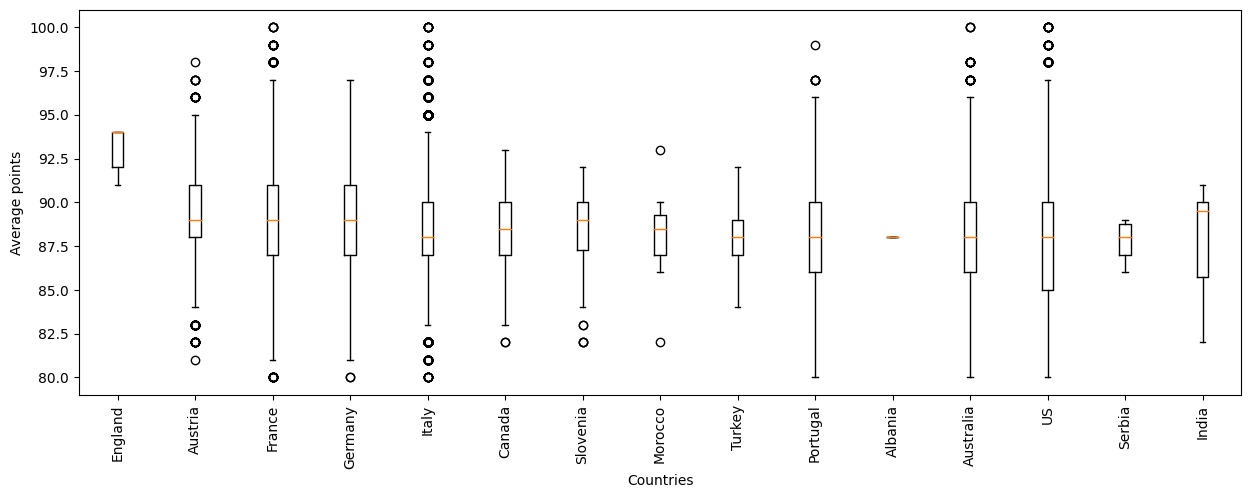

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))

for i, country_df in enumerate(df_top15.partition_by(groups="country")):
    country_name = country_df.select("country")[0, 0]
    ax.boxplot(country_df.select('points'), labels=[country_name], positions=[i])

plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Average points')
plt.show()


# fig, ax = plt.subplots(figsize=(15, 5))

# for i, x in enumerate(df_top15['country'].unique()):
#     ax.boxplot(df_top15[df_top15['country'] == x]['points'], labels=[str(x)], positions=[i])

## Time to go Lazy

> The lazy API offers a way to optimise your queries, similar to Spark. The major benefit over spark is that we don't have to set up our environment and can therefore continue working from our notebook.

> More information can be found in the [Polars-book](https://ritchie46.github.io/polars-book/lazy_polars/intro.html)

In [20]:
lazy_df = pl.scan_csv('winemag-data_first150k.csv')

lazy_df

# lazy_df = pl.scan_csv('winemag-data_first150k', ignore_errors=True)

# if you install Graphviz you will see the Query Plan 

> Printing the type returns 'polars.lazy.LazyFrame' indicating the data is available to us. On to the Groupby `country` and find the average `points` to compare with the eager API that we used earlier.

> Similar to the filters that we did with the eager API we are going to filter the unknown and 'US-France' values in the `country` variable first.

In [21]:
lazy_df.filter(
    (pl.col('country').is_not_null()) &
    (pl.col('country') != 'US-France')
)

# we can see that the query is almost the same
# however this query only returns a query plan

> As we can see nothing happens right away. From the documentation: '_This is due to the lazyness, nothing will happen until specifically requested. This allows Polars to see the whole context of a query and optimize just in time for execution._'

> To actually see the results we can do two things: `collect()` and `fetch()`. The difference is that `fetch` takes the first 500 rows and then runs the query, whereas `collect` runs the query over all the results. Below we can see the differences for our case.

In [22]:
lazy_df.filter(
    (pl.col('country').is_not_null()) &
    (pl.col('country') != 'US-France')
).fetch()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
i64,str,str,str,i64,f64,str,str,str,str,str
0,"""US""","""This tremendou...","""Martha's Viney...",96,235.0,"""California""","""Napa Valley""","""Napa""","""Cabernet Sauvi...","""Heitz"""
1,"""Spain""","""Ripe aromas of...","""Carodorum Sele...",96,110.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Bodega Carmen ..."
2,"""US""","""Mac Watson hon...","""Special Select...",96,90.0,"""California""","""Knights Valley...","""Sonoma""","""Sauvignon Blan...","""Macauley"""
3,"""US""","""This spent 20 ...","""Reserve""",96,65.0,"""Oregon""","""Willamette Val...","""Willamette Val...","""Pinot Noir""","""Ponzi"""
4,"""France""","""This is the to...","""La Brûlade""",95,66.0,"""Provence""","""Bandol""",null,"""Provence red b...","""Domaine de la ..."
5,"""Spain""","""Deep, dense an...","""Numanthia""",95,73.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Numanthia"""
6,"""Spain""","""Slightly gritt...","""San Román""",95,65.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Maurodos"""
7,"""Spain""","""Lush cedary bl...","""Carodorum Únic...",95,110.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Bodega Carmen ..."
8,"""US""","""This re-named ...","""Silice""",95,65.0,"""Oregon""","""Chehalem Mount...","""Willamette Val...","""Pinot Noir""","""Bergström"""


In [23]:
lazy_df.filter(
    (pl.col('country').is_not_null()) &
    (pl.col('country') != 'US-France')
).collect()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
i64,str,str,str,i64,f64,str,str,str,str,str
0,"""US""","""This tremendou...","""Martha's Viney...",96,235.0,"""California""","""Napa Valley""","""Napa""","""Cabernet Sauvi...","""Heitz"""
1,"""Spain""","""Ripe aromas of...","""Carodorum Sele...",96,110.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Bodega Carmen ..."
2,"""US""","""Mac Watson hon...","""Special Select...",96,90.0,"""California""","""Knights Valley...","""Sonoma""","""Sauvignon Blan...","""Macauley"""
3,"""US""","""This spent 20 ...","""Reserve""",96,65.0,"""Oregon""","""Willamette Val...","""Willamette Val...","""Pinot Noir""","""Ponzi"""
4,"""France""","""This is the to...","""La Brûlade""",95,66.0,"""Provence""","""Bandol""",null,"""Provence red b...","""Domaine de la ..."
5,"""Spain""","""Deep, dense an...","""Numanthia""",95,73.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Numanthia"""
6,"""Spain""","""Slightly gritt...","""San Román""",95,65.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Maurodos"""
7,"""Spain""","""Lush cedary bl...","""Carodorum Únic...",95,110.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Bodega Carmen ..."
8,"""US""","""This re-named ...","""Silice""",95,65.0,"""Oregon""","""Chehalem Mount...","""Willamette Val...","""Pinot Noir""","""Bergström"""


We can see from the shapes that `fetch` catches 500 rows and `collect` retrieves all the rows.

In [24]:
lazy_df.groupby('country').agg(
    pl.col('points').mean().alias('points_mean')
).sort(by='points_mean', reverse=True).collect()

#  lazy_df = (
#     lazy_df
#     .groupby('country')
#     .agg([pl.mean('points').alias('avg_points')])
#     .sort("avg_points", reverse=True)
# )

country,points_mean
str,f64
"""England""",92.888889
"""Austria""",89.276742
"""France""",88.92587
"""Germany""",88.626427
"""Italy""",88.413664
"""Canada""",88.239796
"""Slovenia""",88.234043
"""Morocco""",88.166667
"""Turkey""",88.096154


### Out of Core [NEW]

What if you dataset doesn't fit in memory? This example is rather small, but in this day and age it is not unlikely that you are working on datsets that don't fit in memory any more. Polars offers a very easy way to work with that. 

Pretend that our dataset is not ~50MB, but 50GB. What can we do to, for example, Groupby country and do some calculations:

Not much changes, except that in `collect()` we add: `streaming=True` 

In [25]:
lazy_df.groupby('country').agg(
    pl.col('points').mean().alias('points_mean')
).sort(by='points_mean', reverse=True).collect(streaming=True)

country,points_mean
str,f64
"""England""",92.888889
"""Austria""",89.276742
"""France""",88.92587
"""Germany""",88.626427
"""Italy""",88.413664
"""Canada""",88.239796
"""Slovenia""",88.234043
"""Morocco""",88.166667
"""Turkey""",88.096154


## Output

> We have got the output that we are looking for. Polars offers several ways to output our analyses, even to other formats useful for further analyses (e.g. pandas dataframe (`to_pandas()`) or numpy arrays (`to_numpy()`).

In [26]:
lazy_df.collect().write_csv('results.csv')

#  lazy_df.collect().to_csv('results.csv')

## Final words from 2022

> Polars is a new package that is gaining a lot of attention. At the time of writing this article, it has gathered more than 1300 stars on Github, which is impressive looking at the fact that is around for less than a year. It offers almost all the functions that we need to manipulate our dataframe. Next to that, it offers a lazy API that helps us optimising our queries before we execute them. Although we didn't touch it is in this article, the benchmark of H20 shows that it is super efficient and fast. Especially with larger datasets it becomes worthwhile to look into the benefits that the lazy API has to offer.

This is what I wrote two years ago. 1300 stars. In 2022, while I am writing this, the project has collected 10.4k stars on Github and it is number 4 trending project on Github.

There are a lot of improvements happening under the hood and in the APIs. 

For more information, check the [Polars' Github page](https://github.com/pola-rs/polars). Here you can find links to benchmark's, the Polars book or the Polars Discord. 

I highly recommend joining the Discord. There is a lot of activity and many people are happy to help you with your specific questions.